In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1=pd.read_csv('forestfires.csv')
d1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# x- x-axis spatial coordinate within the montesinho park
# y- y-axis spatial coordinate within the montesinho park
# FFMC,DMC,DC,ISI -they are the indeces from FWI system
# RH-relative humidity
# area-Burned area in hectors

In [4]:
d1.shape

(517, 13)

#there are 517 rows and 12 attributes

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
#using label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['month','day']
for val_ in list1:
    d1[val_]=le.fit_transform(d1[val_].astype(str))

In [7]:
d1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
d1.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [9]:
d1.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

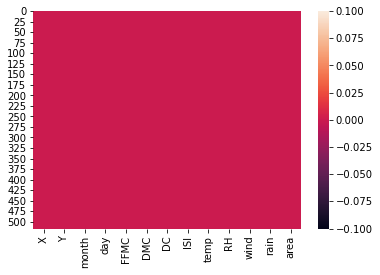

In [10]:
sns.heatmap(d1.isnull())

#there are no null values in this dataset

In [11]:
d1.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
#mean is greater than median for x,y,DMC,ISI,RH - So they are right skewed datas
#median is greater than mean for month,day,FFMC,DC,temp -So they are left skewed datas
#there is a large difference between min and max for FFMC,DMC,ISI,DC and area
#there is great difference between 50% and max for DC,RH an darea-so there might be presence of outliers in this dataset


In [13]:
d1cor=d1.corr()
d1cor

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.017303,-0.009129,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.062162,0.030100,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.017303,-0.062162,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054
day,-0.009129,0.030100,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916
FFMC,-0.021039,-0.046308,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


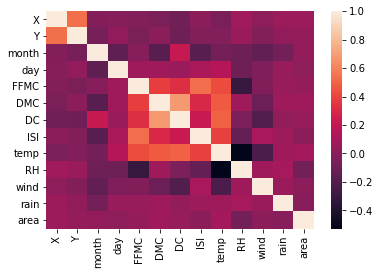

In [14]:
sns.heatmap(d1cor)

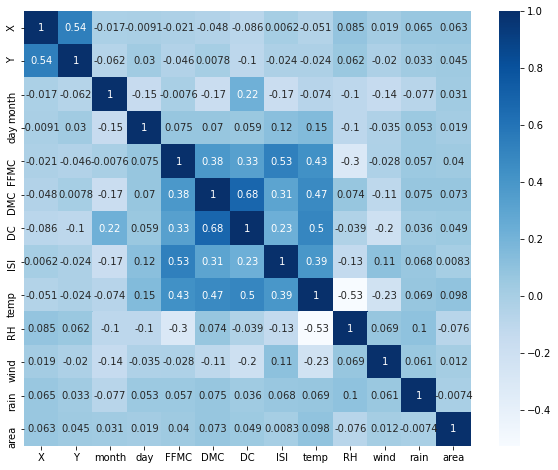

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(d1cor,cmap='Blues',annot=True)

In [16]:
#area is having a negative correlation with rain and relative humidity
#ie,when the relative humidity and rain increases,the damage caused due to forestfire will be less
#We can also see that none of the attribute is having a correlation above 0.1 with the target

In [17]:
d1.drop('ISI',axis=1,inplace=True)

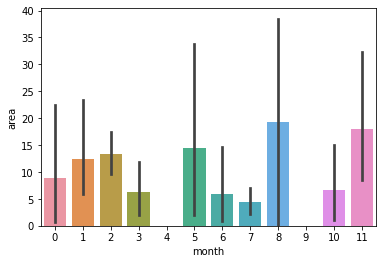

In [18]:
sns.barplot(x=d1["month"],y=d1["area"],data=d1)
plt.show()

#this shows that the most are burnt is in the month of August,then comes june and december
#the least or no area burnt is in the month of may and september

<function matplotlib.pyplot.show(*args, **kw)>

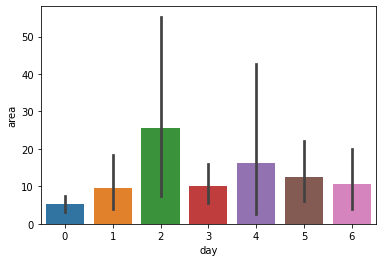

In [19]:
sns.barplot(x=d1["day"],y=d1["area"],data=d1)
plt.show

#the day counts from mon to sun
#most fire occured on wednesday and least on monday

<function matplotlib.pyplot.show(*args, **kw)>

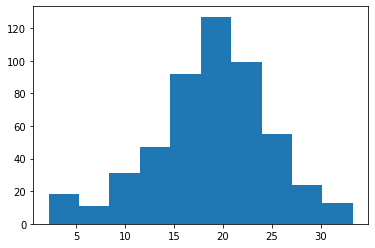

In [20]:
plt.hist(x="temp",data=d1)
plt.show

#here we can see that the most damage occured was when the temperature is around 20
#average fire occured between 15 and 25

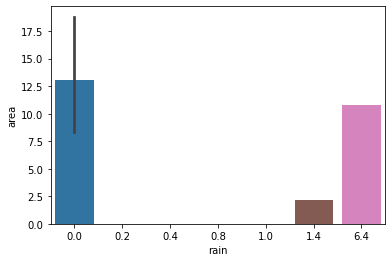

In [21]:
sns.barplot(x="rain",y="area",data=d1)
plt.show()

#from this barplot it is clear that fire hits more area when the rain is 0.0mm/m^2

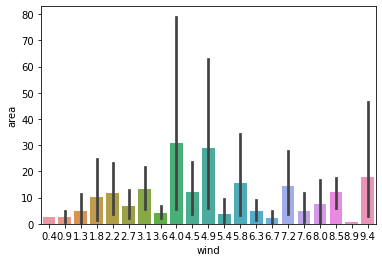

In [22]:
sns.barplot(x="wind",y="area",data=d1)
plt.show()

#this shows that fire becomes more dangerous when the wind speed is between 4 and 5 km/hr
#fire hit area is less when wind speed is less.thus wind helps the fire to spread 

In [23]:
collist=d1.columns.values
ncol=13
nrows=8

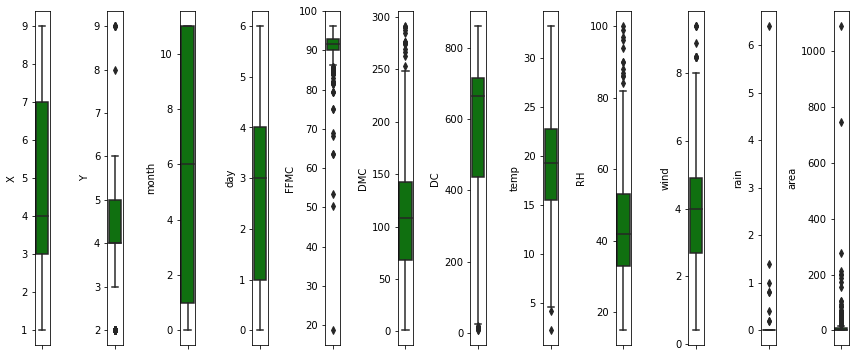

In [24]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')
    plt.tight_layout()

#the boxplot shows there are so many outliers present

In [25]:
d1.skew()

X         0.036246
Y         0.417296
month     0.084074
day       0.157756
FFMC     -6.575606
DMC       0.547498
DC       -1.100445
temp     -0.331172
RH        0.862904
wind      0.571001
rain     19.816344
area     12.846934
dtype: float64

In [26]:
#FFMC,DC,ISI,rain and area are highly skewed datas

In [27]:
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)

In [28]:
d1.skew()

X       -0.130050
Y        0.024821
month   -0.140734
day     -0.149390
FFMC    -0.255977
DMC     -0.097386
DC      -0.860310
temp    -0.044500
RH       0.002721
wind    -0.015674
rain     7.874024
area     0.402101
dtype: float64

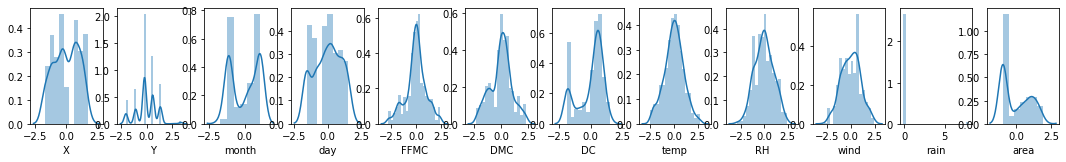

In [29]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

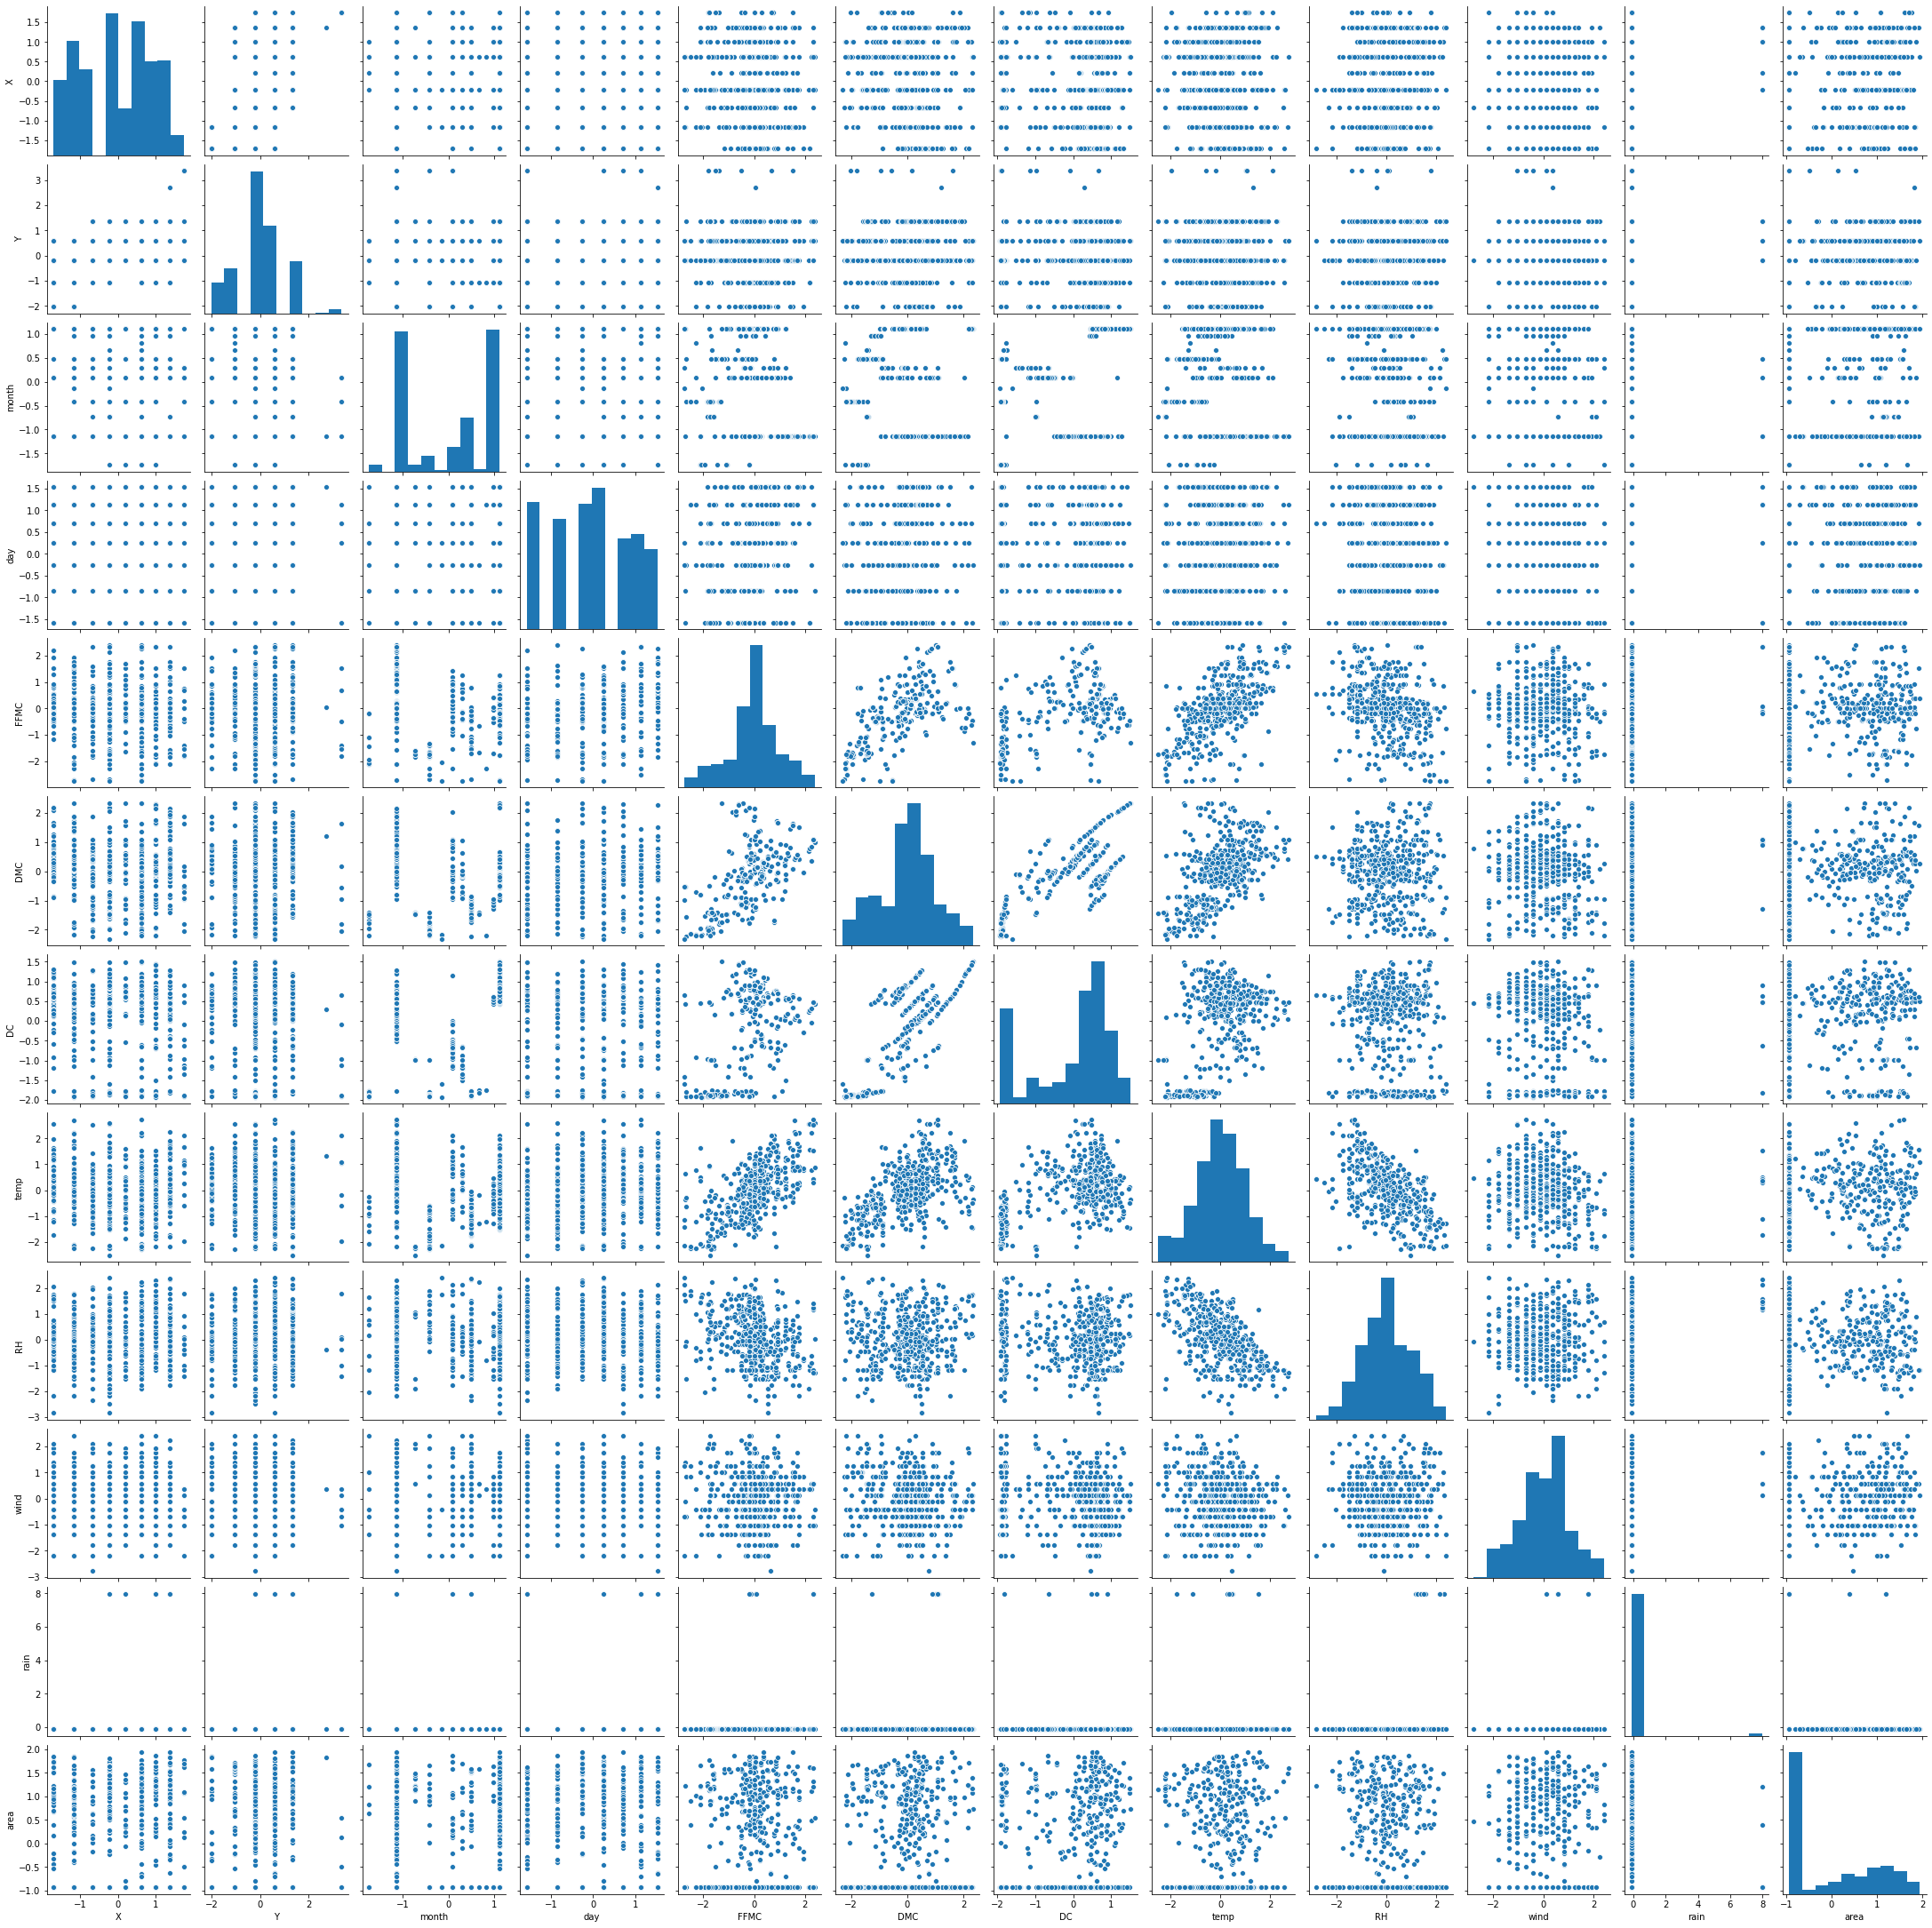

In [30]:
sns.pairplot(d1)

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(d1))
print(d1.shape)
d1.new=d1[(z<3).all(axis=1)]
print(d1.new.shape)

(517, 12)
(503, 12)


In [32]:
#14 rows are deleted due to presence of outliers

In [33]:
x=d1.new.iloc[:,0:-1]
x.head()

,X,Y,month,day,FFMC,DMC,DC,temp,RH,wind,rain
0,0.999239,0.600940,0.486143,-1.582133,-1.467883,-1.444711,-1.785053,-1.758384,0.575641,1.401892,-0.125368
1,0.999239,-0.199165,0.967312,1.130031,-0.342349,-1.226283,0.459980,-0.202436,-0.632805,-2.192913,-0.125368
2,0.999239,-0.199165,0.967312,-0.270843,-0.342349,-1.046188,0.552448,-0.778094,-0.632805,-1.794804,-0.125368
4,1.374787,1.349010,0.486143,0.240930,-0.745268,-0.891817,-1.767791,-1.287056,2.380468,-1.357666,-0.125368
5,1.374787,1.349010,-1.143662,0.240930,0.297782,-0.283126,-0.415172,0.551536,-0.994286,0.825888,-0.125368


In [34]:
y=d1.new.iloc[:,-1]
y.head()

0   -0.933081
1   -0.933081
2   -0.933081
4   -0.933081
5   -0.933081
Name: area, dtype: float64

In [35]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 90 is 0.027945061581700736


In [36]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [37]:
dataset=d1.new

In [38]:
alphavalue={'alpha':[0,0.01,0.001,0.0001,0.1,1]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)

In [39]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 0.01, 0.001, 0.0001, 0.1, 1]})
-0.029973833889536717
1
{'alpha': 1}


In [40]:
from sklearn.linear_model import Lasso
dataset=d1.new
alphavalue={'alpha':[0,0.01,0.001,0.0001,0.1,1]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0, 0.01, 0.001, 0.0001, 0.1, 1]})
-0.014612489396074934
0.1
{'alpha': 0.1}


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=90)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04650912,  0.69430115,  0.46835223, ...,  0.60699844,
         1.41149359,  0.        ],
       [ 1.04650912, -0.15984269,  0.94756957, ..., -0.61798077,
        -2.17919494,  0.        ],
       [ 1.04650912, -0.15984269,  0.94756957, ..., -0.61798077,
        -1.78154187,  0.        ],
       ...,
       [ 1.04650912, -0.15984269, -1.15484077, ...,  1.48664075,
         1.41149359,  0.        ],
       [-1.69519634, -0.15984269, -1.15484077, ...,  0.06267103,
         0.12111707,  0.        ],
       [ 0.6517896 , -1.08595666,  0.79927324, ..., -0.79514585,
         0.39026391,  0.        ]])

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
lm.coef_

array([ 0.0345554 ,  0.05299174,  0.02970091,  0.04938789, -0.03547747,
        0.05100121,  0.0334348 ,  0.00872722, -0.03986753,  0.09188227,
        0.        ])

In [47]:
lm.intercept_

0.019004039995920076

In [48]:
lm.score(x_train,y_train)

0.019632957605167922

In [49]:
pred=lm.predict(x_test)
print('predicted strength:',pred)
print('actual strength:',y_test)

predicted strength: [-0.33937145  0.20089768  0.09261983 -0.25111561 -0.03898755  0.05952505
 -0.03560657 -0.14984975 -0.05471179 -0.23689072 -0.10201899 -0.08769926
  0.07132458 -0.19110885 -0.10791834  0.10972527 -0.07482907 -0.14245499
  0.33093908  0.04757526  0.08142191  0.13502818 -0.1875757   0.01410414
 -0.05843823  0.0867668   0.14839203  0.18452517  0.13636753  0.25484393
 -0.09432068  0.01419852 -0.0855219   0.10643646  0.23327389  0.05300039
  0.08319526 -0.01945984 -0.03974952  0.03313891  0.30379427  0.32606263
  0.11841968 -0.03322641  0.24942338  0.06166932 -0.03605783  0.23326709
  0.04546488 -0.02229607 -0.17513969  0.07711006 -0.06041958 -0.00044283
 -0.07470619 -0.15889342 -0.01775024 -0.15315172  0.20659509 -0.27836899
  0.04523696  0.19970787  0.03778033  0.00939366 -0.09572808  0.13060175
  0.04305858  0.0028909  -0.22535297  0.05101318  0.08231527  0.03969236
  0.0101976   0.08723013  0.11854001  0.10295836 -0.01193868  0.20341083
  0.14694687 -0.12371676  0.071

In [50]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.9541442412851686
mean squared error: 1.0513711298626316
root mean squared error: 1.0253639011895395


In [51]:
print(r2_score(y_test,pred))

0.027945061581700736


In [52]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[-3.24920919e+31 -8.96655886e-02 -5.66265468e-01 -1.46258446e-01
 -2.91117524e-01]
-6.498418389076035e+30 1.299683677815207e+31


In [53]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn .linear_model import Lasso,Ridge, ElasticNet
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.0

In [54]:
lscores=cross_val_score(ls,x,y,cv=5)
print(lscores)
print(lscores.mean(),lscores.std())

[-2.84331552e+31 -1.44064223e-02 -3.68129288e-01 -7.33993917e-02
 -3.08271867e-02]
-5.686631039305558e+30 1.1373262078611113e+31


In [55]:
import joblib
joblib.dump(ls,'ls_forestfire.pkl')

['ls_forestfire.pkl']